reference:

* http://learningjulia.com/2017/02/20/getting-started-with-images.html

In [1]:
using Images, TestImages, Colors # load image


In [2]:
using Random, Distributions # normal etc

In [3]:
using Plots # basic plot

In [4]:
using ImageFiltering

In [5]:
using Random, Distributions

In [6]:
using Printf

In [7]:
#using ImageView # imshow

In [8]:
#img = testimage("lighthouse")


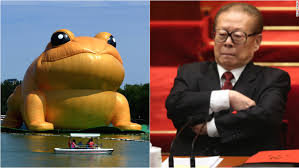

In [9]:
img = load("toad_and_jiang.jpg") # require package `ImageMagick`, 
#related to some shit problems: https://github.com/JuliaIO/ImageMagick.jl/issues/133

In [10]:
img[1,1,1]

In [11]:
summary(img)

"168×299 Array{RGB{N0f8},2} with eltype RGB{Normed{UInt8,8}}"

In [12]:
c = img[10];

In [13]:
println(c.r, " ", c.g, " ", c.b);
println(red(c), " ", green(c), " ", blue(c));


0.651N0f8 0.765N0f8 0.882N0f8
0.651N0f8 0.765N0f8 0.882N0f8


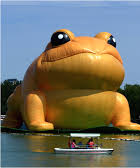

In [14]:
simg = img[1:size(img,1),1:140]

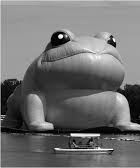

In [15]:
toad = Gray.(simg)

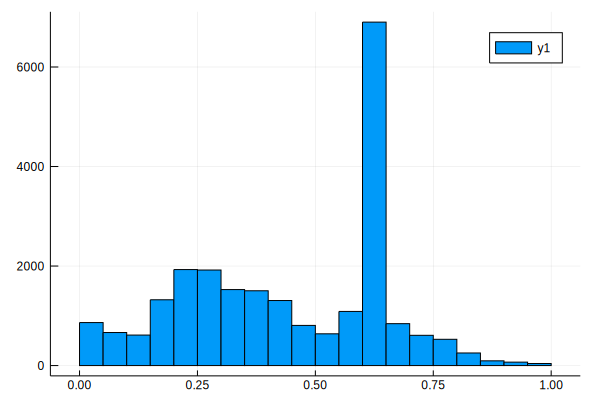

In [16]:
histogram(vec(convert(Array{Float64}, toad)))

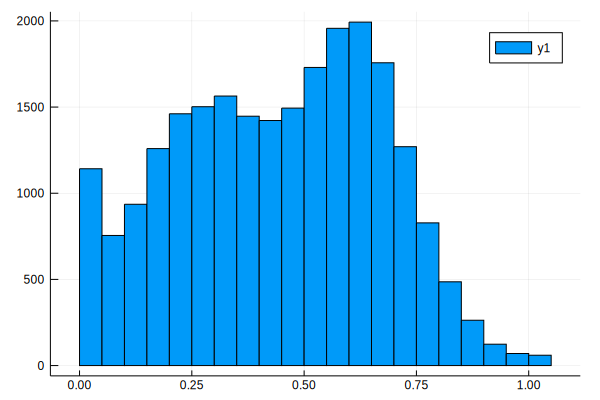

In [17]:
toad_noised = clamp.(convert(Array{Float64}, toad + rand(Normal(0,25/255), size(toad))), 0.0, 1.0)
histogram(vec(toad_noised))

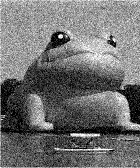

In [18]:
Gray.(toad_noised)

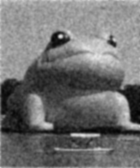

In [19]:
imfilter(Gray.(toad_noised), Kernel.gaussian(1))

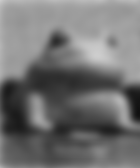

In [20]:
imfilter(Gray.(toad_noised), Kernel.gaussian(4))

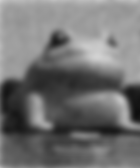

In [21]:
imfilter(Gray.(toad_noised), Kernel.gaussian(3))

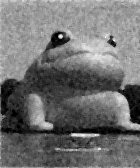

In [22]:
Gray.(mapwindow(median, toad_noised, (3,3))) # https://github.com/JuliaImages/ImageFiltering.jl/pull/14

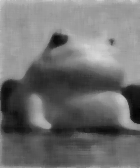

In [23]:
Gray.(mapwindow(median, toad_noised, (9,9))) # https://github.com/JuliaImages/ImageFiltering.jl/pull/14

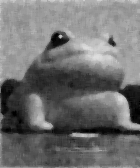

In [24]:
Gray.(mapwindow(median, toad_noised, (5,5))) # https://github.com/JuliaImages/ImageFiltering.jl/pull/14

In [25]:
ii = [i for i=1:size(toad_noised,1),j=1:size(toad_noised,2)] 
jj = [j for i=1:size(toad_noised,1),j=1:size(toad_noised,2)] 
# simulate ngrid/meshgrid since julia reject to expose this function as a independent one: 
# https://github.com/JuliaAttic/Examples/blob/master/ndgrid.jl
#iijj = cat(ii,jj,dims=3) # interesting, julia use `cat` as numpy.stack and numpy.concatenate 
iijj = cat(reshape(ii,1,size(ii,1),size(ii,2)),reshape(jj,1,size(jj,1),size(jj,2)),dims=1)
size(iijj)

(2, 168, 140)

In [26]:
IJ = reshape(iijj, 2, size(iijj,2)*size(iijj,3))
size(IJ)

(2, 23520)

In [27]:
IJ

2×23520 Array{Int64,2}:
 1  2  3  4  5  6  7  8  9  10  11  12  …  162  163  164  165  166  167  168
 1  1  1  1  1  1  1  1  1   1   1   1     140  140  140  140  140  140  140

In [28]:
#IJ[1:5,:],IJ[1995:2000,:]

BoundsError: BoundsError: attempt to access 2×23520 Array{Int64,2} at index [1:5, Base.Slice(Base.OneTo(23520))]

In [29]:
ij = [50;100]

2-element Array{Int64,1}:
  50
 100

In [30]:
dis = Normal()
K = x->pdf(dis,x)

#7 (generic function with 1 method)

In [31]:
Wx = K.(sum(abs.(ij .- IJ),dims=1))

1×23520 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [32]:
#Gray.(reshape(Wx, size(toad,1), size(toad,2)))

In [33]:
size(Wx)

(1, 23520)

In [34]:
_X = sum(ij .- IJ, dims=1)

1×23520 Array{Int64,2}:
 148  147  146  145  144  143  142  …  -153  -154  -155  -156  -157  -158

In [35]:
X = cat(1, _X, dims=1)

2×23520 Array{Int64,2}:
   1    1    1    1    1    1    1  …     1     1     1     1     1     1
 148  147  146  145  144  143  142     -153  -154  -155  -156  -157  -158

In [36]:
Y = reshape(toad_noised, 1, size(toad_noised,1)*size(toad_noised,2))

1×23520 Array{Float64,2}:
 0.916448  0.784372  1.0  0.754995  0.81874  …  0.335643  0.36356  0.635948

In [37]:
#a = inv((X .* Wx) @ X) @ (X.T * Wx) @ Y

In [38]:
size(X),size(Wx),size(X)

((2, 23520), (1, 23520), (2, 23520))

In [39]:
a = inv((X .* Wx) * X') * (X .* Wx) * Y'

2×1 Array{Float64,2}:
 0.7576394852358047 
 0.00581290840394313

In [40]:
a[1]/a[2]

130.33742020119692

In [41]:
ones(10,10)

10×10 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [42]:
@time begin

    mat = zeros(3, size(toad_noised,1), size(toad_noised,2))

    for i=1:size(toad_noised,1)
        for j=1:size(toad_noised,2)
            ij = [i;j]
            Wx = K.(sum(abs.(ij .- IJ),dims=1))
            _X = sum(ij .- IJ, dims=1)
            X = cat(1, _X, dims=1)

            l = inv((X .* Wx) * X') * (X .* Wx)
            a = l * Y'

            mat[1,i,j] = a[1,1]
            mat[2,i,j] = a[2,1]
            mat[3,i,j] = sum(l.^2)
        end
    end

end

 92.903088 seconds (1.11 G allocations: 86.705 GiB, 7.81% gc time)


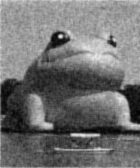

In [43]:
Gray.(mat[1,:,:])

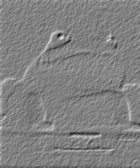

In [44]:
Gray.((mat[2,:,:] .- minimum(mat[2,:,:]))./(maximum(mat[2,:,:])-minimum(mat[2,:,:])))

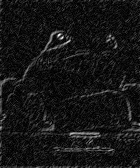

In [45]:
coef = abs.(mat[2,:,:])
coef_min = minimum(coef)
coef_max = maximum(coef)
Gray.((coef .- coef_min)./(coef_max - coef_min))

In [46]:
coef

168×140 Array{Float64,2}:
 0.0910983   0.0803063   0.00600295   …  0.0442499   0.0602873   0.070554  
 0.0524468   0.029867    0.00762938      0.0383084   0.0547175   0.0155434 
 0.0546976   0.0472165   0.042908        0.0610311   0.00991853  0.0259829 
 0.0857654   0.0405071   0.0222247       0.0331269   0.0149471   0.0194644 
 0.0762932   0.0424918   0.0245479       0.0198845   0.0095822   0.0140218 
 0.0214437   0.00711212  0.00139267   …  0.0196834   0.0336443   0.00863511
 0.0312905   0.00396754  0.00687243      0.0364527   0.00958865  0.0454969 
 0.0334079   0.0069839   0.0132038       0.00791425  0.00026745  0.00034321
 0.0385414   0.0339947   0.0536623       0.00883874  0.00623213  0.034076  
 0.0494263   0.0931371   0.0527553       0.0348446   0.0267084   0.041151  
 0.0886813   0.0709353   0.00795426   …  0.0339133   0.00181276  0.0136121 
 0.0736664   0.0399528   0.026329        0.00709699  0.0345505   0.01251   
 0.0426879   0.00640953  0.0186377       0.0341975   0.0021935

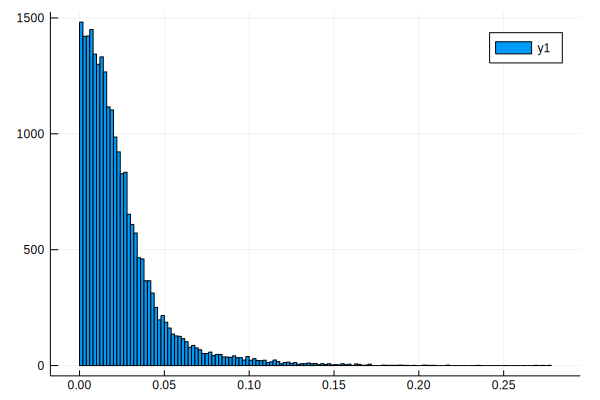

In [47]:
histogram(vec(coef))

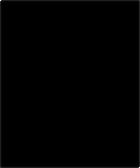

In [48]:
coef = (mat[3,:,:])
coef_min = minimum(coef)
coef_max = maximum(coef)
Gray.((coef .- coef_min)./(coef_max - coef_min))

In [49]:
coef

168×140 Array{Float64,2}:
 1.05929   0.393789  0.288843  0.278523  …  0.281281  0.302192  0.390213
 0.393789  0.221231  0.19012   0.186783     0.189079  0.208888  0.302192
 0.288843  0.19012   0.170143  0.167929     0.170053  0.189079  0.281281
 0.278523  0.186783  0.167929  0.165836     0.167926  0.186744  0.278241
 0.278078  0.186636  0.167831  0.165744     0.167831  0.186636  0.278074
 0.278071  0.186634  0.16783   0.165743  …  0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743  …  0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 ⋮                       

In [50]:
#histogram(vec(sqrt.(coef))) # stucked on it, why?

In [51]:
size(vec(coef))

(23520,)

In [52]:
function local_reg(h=1.0)
        
    mat = zeros(3, size(toad_noised,1), size(toad_noised,2))

    for i=1:size(toad_noised,1)
        for j=1:size(toad_noised,2)
            ij = [i;j]
            Wx = K.(sum(abs.(ij .- IJ),dims=1)/h)
            _X = sum(ij .- IJ, dims=1)
            X = cat(1, _X, dims=1)

            l = inv((X .* Wx) * X') * (X .* Wx)
            a = l * Y'

            mat[1,i,j] = a[1,1]
            mat[2,i,j] = a[2,1]
            mat[3,i,j] = sum(l.^2)
        end
    end
    
    return mat
end

local_reg (generic function with 2 methods)

In [53]:
@time mat=local_reg()

 89.131111 seconds (1.66 G allocations: 99.075 GiB, 7.98% gc time)


3×168×140 Array{Float64,3}:
[:, :, 1] =
 0.89567    0.819785   0.833797   …  0.500731     0.547273    0.745793 
 0.0910983  0.0524468  0.0546976     0.00138223  -0.0525617  -0.0746168
 1.05929    0.393789   0.288843      0.281281     0.302192    0.390213 

[:, :, 2] =
 0.770551   0.709282  0.717095   …   0.415004    0.488234    0.659673 
 0.0803063  0.029867  0.0472165     -0.0145579  -0.0498721  -0.0274395
 0.393789   0.221231  0.19012        0.189079    0.208888    0.302192 

[:, :, 3] =
 0.732102     0.683031    0.662074  …   0.439785     0.477919   0.624614 
 0.00600295  -0.00762938  0.042908     -0.00392897  -0.049337  -0.0327278
 0.288843     0.19012     0.170143      0.170053     0.189079   0.281281 

...

[:, :, 138] =
 0.781498   0.709121   0.68787    …  0.481269    0.50071     0.612083 
 0.0442499  0.0383084  0.0610311     0.0164036  -0.0217381  -0.0516568
 0.281281   0.189079   0.170053      0.170143    0.19012     0.288843 

[:, :, 139] =
 0.739375   0.676158   0.663054    

In [54]:
@time mat2=local_reg(5.0)

 99.129568 seconds (1.66 G allocations: 99.052 GiB, 6.84% gc time)


3×168×140 Array{Float64,3}:
[:, :, 1] =
 0.775174   0.758695   0.743428   0.730252   …   0.485549      0.504514  
 0.0111681  0.0106889  0.0104296  0.0100196     -0.000840263  -0.00463123
 0.0890812  0.0646662  0.0480247  0.0366587      0.0158419     0.0177637 

[:, :, 2] =
 0.758904   0.744899   0.730584   0.717037    …   0.474178     0.495455  
 0.0106556  0.0104443  0.0103096  0.00988523     -0.00282902  -0.00638186
 0.0646662  0.0473628  0.0354307  0.0272377       0.0137183    0.0158419 

[:, :, 3] =
 0.744886   0.731592    0.718556    0.705225    …   0.468489     0.49168   
 0.0100951  0.00993413  0.00995652  0.00955447     -0.00329334  -0.00653041
 0.0480247  0.0354307   0.0267173   0.020745        0.0124312    0.0146967 

...

[:, :, 138] =
 0.693081    0.677347    0.665988    0.655116    …   0.480012     0.491089  
 0.00905408  0.00760663  0.00672214  0.00592167     -0.00220175  -0.00236009
 0.0146967   0.0124312   0.0110389   0.0101339       0.0354307    0.0480247 

[:, :, 139

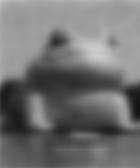

In [55]:
Gray.(mat2[1,:,:])

In [56]:
@time mat3=local_reg(3.0)

100.089832 seconds (1.66 G allocations: 99.052 GiB, 7.11% gc time)


3×168×140 Array{Float64,3}:
[:, :, 1] =
 0.815102   0.785716   0.759021   0.735206   …   0.511901     0.553321 
 0.0225498  0.0213969  0.0201154  0.0164728     -0.00688435  -0.0165112
 0.20599    0.124859   0.0814433  0.0582987      0.0397943    0.0468586

[:, :, 2] =
 0.775077   0.752278   0.729349   …   0.470503     0.496899    0.54372  
 0.0176982  0.0169309  0.0158954     -0.00551204  -0.0114136  -0.0203477
 0.124859   0.077206   0.0516499      0.0279789    0.0318395   0.0397943

[:, :, 3] =
 0.751726   0.729268   0.710537   …   0.463299     0.493271    0.545016 
 0.0147845  0.013647   0.0133388     -0.00621064  -0.0113988  -0.0188834
 0.0814433  0.0516499  0.0359659      0.0237545    0.0279789   0.0365318

...

[:, :, 138] =
 0.724291   0.696119   0.681803   0.662708   …   0.489373     0.517859  
 0.0192705  0.0160855  0.0159509  0.0145314     -0.00859673  -0.00989155
 0.0365318  0.0279789  0.0237545  0.02157        0.0516499    0.0814433 

[:, :, 139] =
 0.711502   0.687085   0.6

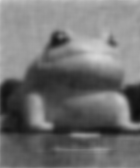

In [57]:
Gray.(mat3[1,:,:])

In [58]:
@time mat4=local_reg(2.0)

 97.491473 seconds (1.66 G allocations: 99.052 GiB, 7.70% gc time)


3×168×140 Array{Float64,3}:
[:, :, 1] =
 0.843243   0.808979   0.783187   …   0.499581     0.531398    0.603802
 0.0358984  0.0360571  0.0392861     -0.00335152  -0.014312   -0.030012
 0.381407   0.192457   0.117087       0.0757318    0.0823816   0.101169

[:, :, 2] =
 0.778842   0.751166  0.725899   …   0.462973    0.505686    0.586668 
 0.0263594  0.025956  0.0274025     -0.0117491  -0.0225859  -0.0352597
 0.192457   0.102895  0.0683216      0.0530385   0.0610493   0.0823816

[:, :, 3] =
 0.748975   0.717068   0.695798   …   0.458343    0.501474    0.588056 
 0.0180925  0.0172962  0.0200309     -0.0116571  -0.0202039  -0.029526 
 0.117087   0.0683216  0.049941       0.0443848   0.0530385   0.0757318

...

[:, :, 138] =
 0.745716   0.702259   0.690967   …   0.475743     0.493587    0.546439 
 0.0298102  0.0230279  0.0274834     -0.00386206  -0.0128578  -0.0213168
 0.0757318  0.0530385  0.0443848      0.049941     0.0683216   0.117087 

[:, :, 139] =
 0.72143    0.686838   0.677853   …

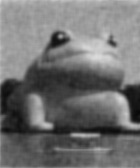

In [59]:
Gray.(mat4[1,:,:])

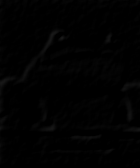

In [60]:
Gray.(mat4[2,:,:])

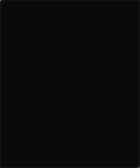

In [61]:
Gray.(mat4[3,:,:])

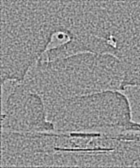

In [62]:
coef = imfilter(Gray.(toad_noised), Kernel.LoG(1))
coef_min = minimum(coef)
coef_max = maximum(coef)
Gray.((coef .- coef_min)./(coef_max - coef_min))

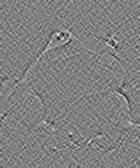

In [63]:
coef = imfilter(Gray.(toad_noised), Kernel.sobel())
coef_min = minimum(coef)
coef_max = maximum(coef)
Gray.((coef .- coef_min)./(coef_max - coef_min))

In [64]:
Kernel.LoG(1)

OffsetArray(::Array{Float64,2}, -4:4, -4:4) with eltype Float64 with indices -4:4×-4:4:
 5.37316e-7   1.36417e-5  0.000130061  …  1.36417e-5  5.37316e-7 
 1.36417e-5   0.00031426  0.00263208      0.00031426  1.36417e-5 
 0.000130061  0.00263208  0.0174901       0.00263208  0.000130061
 0.000485745  0.00857902  0.0391927       0.00857902  0.000485745
 0.000747467  0.0123764   0.0430786       0.0123764   0.000747467
 0.000485745  0.00857902  0.0391927    …  0.00857902  0.000485745
 0.000130061  0.00263208  0.0174901       0.00263208  0.000130061
 1.36417e-5   0.00031426  0.00263208      0.00031426  1.36417e-5 
 5.37316e-7   1.36417e-5  0.000130061     1.36417e-5  5.37316e-7 

In [65]:
#@time

sigma_noise = 25
simga_imfilter_range = 0.1:0.2:3
T = 200

sigma_loss_list = zeros(length(simga_imfilter_range))
sigma_loss_std_list = zeros(length(simga_imfilter_range))

for simga_imfilter_idx=1:length(simga_imfilter_range)
    simga_imfilter = simga_imfilter_range[simga_imfilter_idx]
    loss_list = zeros(T)
    for t=1:T
        toad_noised = clamp.(convert(Array{Float64}, toad + rand(Normal(0,sigma_noise/255), size(toad))), 0.0, 1.0)
        toad_filtered = imfilter(Gray.(toad_noised), Kernel.gaussian(simga_imfilter))
        loss_list[t] = mean((toad_filtered - toad).^2)
    end
    sigma_loss_list[simga_imfilter_idx] = mean(loss_list)
    sigma_loss_std_list[simga_imfilter_idx] = std(loss_list)
end

In [66]:
toad_noised = clamp.(convert(Array{Float64}, toad + rand(Normal(0,sigma_noise/255), size(toad))), 0.0, 1.0);

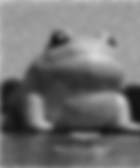

In [67]:
toad_filtered = imfilter(Gray.(toad_noised), Kernel.gaussian(3))

In [68]:
0.1:0.5

0.1:1.0:0.1

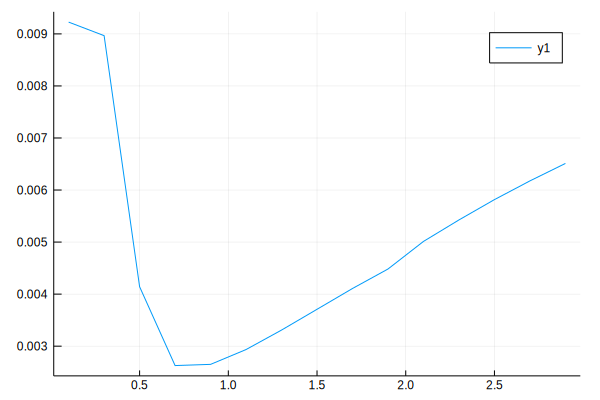

In [69]:
plot(simga_imfilter_range,sigma_loss_list)

In [70]:
savefig("images/crossvalidation1.png")

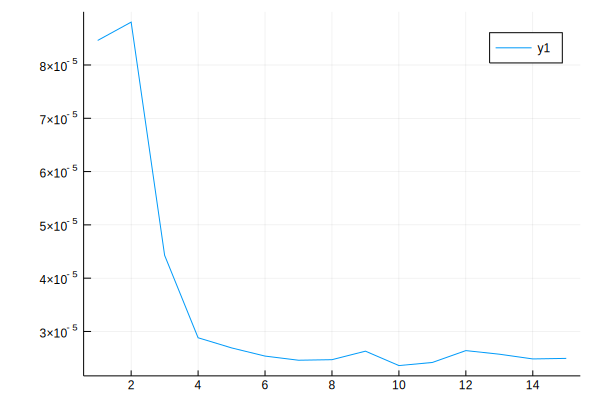

In [71]:
plot(sigma_loss_std_list)

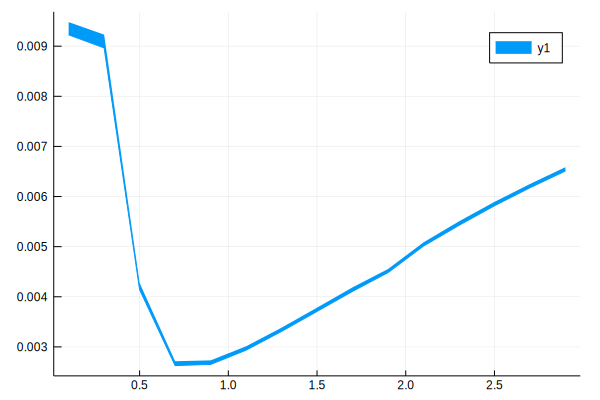

In [72]:
plot(simga_imfilter_range,sigma_loss_list,fillrange=[sigma_loss_list+sigma_loss_std_list.*3,sigma_loss_list-sigma_loss_std_list.*3])

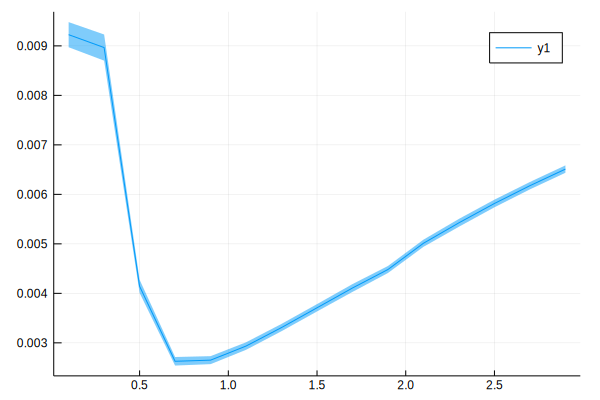

In [73]:
plot(simga_imfilter_range,sigma_loss_list,ribbon=sigma_loss_std_list.*3)

In [74]:
#savefig("images/crossvalidation1.png")

In [75]:
K=Kernel.gaussian(1)
for s=-2:2
    row = map(x -> @sprintf("%.4f",x), K[s,:])
    println(string(join(row," & ")," \\\\"))
end

0.0030 & 0.0133 & 0.0219 & 0.0133 & 0.0030 \\
0.0133 & 0.0596 & 0.0983 & 0.0596 & 0.0133 \\
0.0219 & 0.0983 & 0.1621 & 0.0983 & 0.0219 \\
0.0133 & 0.0596 & 0.0983 & 0.0596 & 0.0133 \\
0.0030 & 0.0133 & 0.0219 & 0.0133 & 0.0030 \\


In [76]:
K=Kernel.gaussian(1)
K[0,0]=0
for s=-2:2
    row = map(x -> @sprintf("%.4f",x), K[s,:])
    println(string(join(row," & ")," \\\\"))
end

0.0030 & 0.0133 & 0.0219 & 0.0133 & 0.0030 \\
0.0133 & 0.0596 & 0.0983 & 0.0596 & 0.0133 \\
0.0219 & 0.0983 & 0.0000 & 0.0983 & 0.0219 \\
0.0133 & 0.0596 & 0.0983 & 0.0596 & 0.0133 \\
0.0030 & 0.0133 & 0.0219 & 0.0133 & 0.0030 \\


In [77]:
K=Kernel.gaussian(1)
K[0,0]=0
K = K./sum(K)
for s=-2:2
    row = map(x -> @sprintf("%.4f",x), K[s,:])
    println(string(join(row," & ")," \\\\"))
end

0.0035 & 0.0159 & 0.0262 & 0.0159 & 0.0035 \\
0.0159 & 0.0712 & 0.1173 & 0.0712 & 0.0159 \\
0.0262 & 0.1173 & 0.0000 & 0.1173 & 0.0262 \\
0.0159 & 0.0712 & 0.1173 & 0.0712 & 0.0159 \\
0.0035 & 0.0159 & 0.0262 & 0.0159 & 0.0035 \\


In [78]:
sigma_noise = 25
simga_imfilter_range = 0.2:0.2:3
T = 200

sigma_loss_list = zeros(length(simga_imfilter_range))
sigma_loss_std_list = zeros(length(simga_imfilter_range))

for simga_imfilter_idx=1:length(simga_imfilter_range)
    simga_imfilter = simga_imfilter_range[simga_imfilter_idx]
    
    K = Kernel.gaussian(simga_imfilter)
    K[0,0]=0
    K = K./sum(K)
    toad_filtered = imfilter(Gray.(toad_noised), K)
    
    #sigma_loss_list[simga_imfilter_idx] = mean((toad_filtered - toad).^2)
    sigma_loss_list[simga_imfilter_idx] = mean((toad_filtered - toad_noised).^2)
end


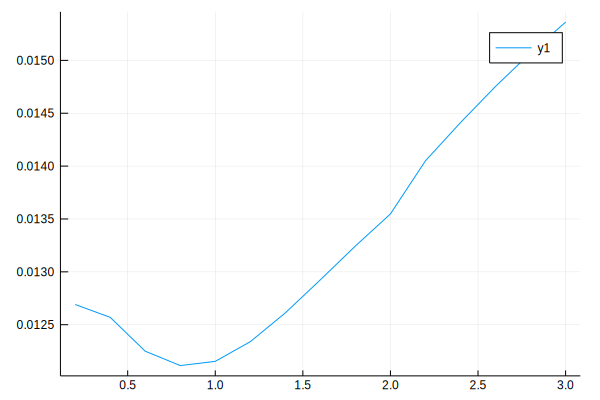

In [79]:
plot(simga_imfilter_range, sigma_loss_list)

In [80]:
#savefig("images/crossvalidation2.png")

In [81]:
sigma_noise = 25
simga_imfilter_range = 0.2:0.2:3
T = 200

sigma_loss_list_534 = zeros(length(simga_imfilter_range))
#sigma_loss_std_list = zeros(length(simga_imfilter_range))

for simga_imfilter_idx=1:length(simga_imfilter_range)
    simga_imfilter = simga_imfilter_range[simga_imfilter_idx]
    
    K = Kernel.gaussian(simga_imfilter)
    #K[0,0]=0
    #K = K./sum(K)
    toad_filtered = imfilter(Gray.(toad_noised), K)
    
    #sigma_loss_list_534[simga_imfilter_idx] = mean(((toad_filtered - toad)./(1-K[0,0])).^2)
    sigma_loss_list_534[simga_imfilter_idx] = mean(((toad_filtered - toad_noised)./(1-K[0,0])).^2)
end


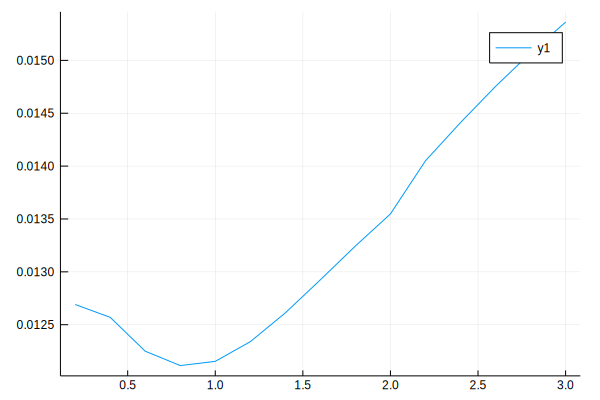

In [82]:
plot(simga_imfilter_range, sigma_loss_list_534)

In [83]:
#savefig("images/crossvalidation2.png")

In [84]:
n = prod(size(toad_noised))

23520

In [85]:
K=Kernel.gaussian(1)
#K[0,0]=0
#K = K./sum(K)

OffsetArray(::Array{Float64,2}, -2:2, -2:2) with eltype Float64 with indices -2:2×-2:2:
 0.00296902  0.0133062  0.0219382  0.0133062  0.00296902
 0.0133062   0.0596343  0.0983203  0.0596343  0.0133062 
 0.0219382   0.0983203  0.162103   0.0983203  0.0219382 
 0.0133062   0.0596343  0.0983203  0.0596343  0.0133062 
 0.00296902  0.0133062  0.0219382  0.0133062  0.00296902

In [86]:
nu = K[0,0] * n
nu_tilde = sum(K.^2) * n

1941.4988016993454

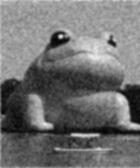

In [87]:
toad_filtered = imfilter(Gray.(toad_noised), K)

In [88]:
println(sum((toad_filtered - toad_noised).^2)/(n-2*nu+nu_tilde))

0.011251731368008746


In [89]:
25/255

0.09803921568627451

In [90]:
sigma_noise

25

In [91]:
sigma_noise/255

0.09803921568627451

In [92]:
particles = 200
est_mat = zeros(4,particles)

for (t,sigma_filter) in enumerate([0.2,0.5,1.0,2.0])
    
    n = prod(size(toad_noised))
    K=Kernel.gaussian(sigma_filter)
    nu = K[0,0] * n
    nu_tilde = sum(K.^2) * n
    
    #est_list = zeros(200)
    for i=1:particles
        toad_noised = clamp.(convert(Array{Float64}, toad + rand(Normal(0,sigma_noise/255), size(toad))), 0.0, 1.0)
        toad_filtered = imfilter(Gray.(toad_noised), K)
        est_mat[t,i] = sqrt.(sum((toad_filtered - toad_noised).^2)/(n-2*nu+nu_tilde))
    end
    #histogram(est_list)
end

In [93]:
est_mat

4×200 Array{Float64,2}:
 0.100425  0.100552  0.101244  0.102704  …  0.101372  0.0997376  0.101513
 0.102561  0.102254  0.10191   0.103127     0.103114  0.101583   0.10173 
 0.106912  0.10738   0.107697  0.107802     0.10667   0.107094   0.106651
 0.116694  0.116093  0.115379  0.116278     0.115419  0.116454   0.116594

In [94]:
sqrt.(est_mat[1,:])

200-element Array{Float64,1}:
 0.3168982911999401 
 0.3170993610904452 
 0.3181880747018038 
 0.32047465036176437
 0.31814462551855843
 0.31720522599976986
 0.31716789043295557
 0.3183270847599224 
 0.31860727971384445
 0.31797362397008266
 0.31862980674380137
 0.31752285629913213
 0.31862520862175325
 ⋮                  
 0.31738366600238194
 0.3183154326208661 
 0.31811096651718934
 0.3182656875822794 
 0.317070462571192  
 0.31815291455064315
 0.3176459573342732 
 0.31747499016779707
 0.3181738150497384 
 0.3183903676060732 
 0.3158125834301335 
 0.3186118293859561 

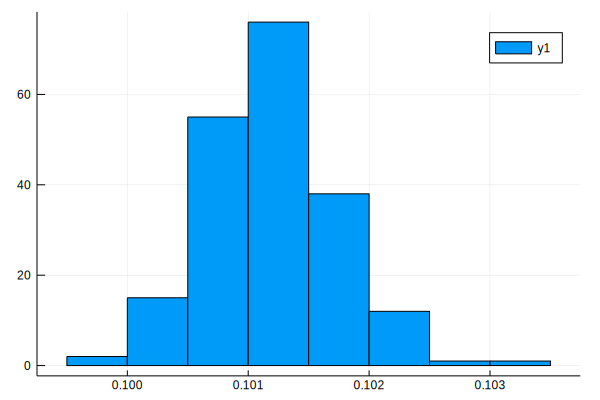

In [95]:
histogram(est_mat[1,:])

In [96]:
#savefig("images/std_est_1.png")

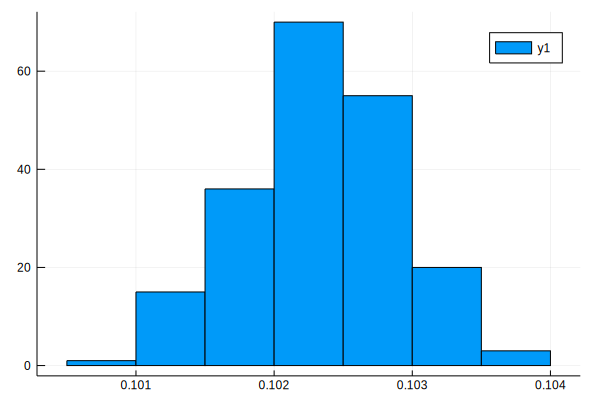

In [97]:
histogram(est_mat[2,:])

In [98]:
#savefig("images/std_est_2.png")

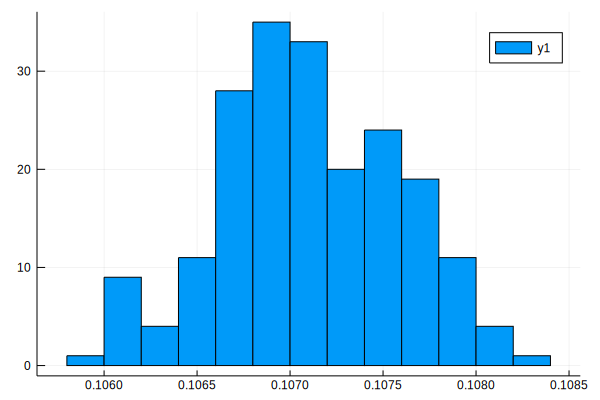

In [99]:
histogram(est_mat[3,:])

In [100]:
#savefig("images/std_est_3.png")

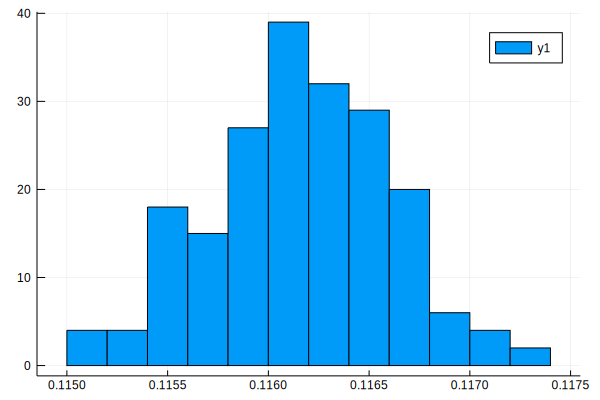

In [101]:
histogram(est_mat[4,:])

In [102]:
#savefig("images/std_est_4.png")

In [103]:
n,-2*nu,nu_tilde

(23520, -1960.7594665914319, 512.332274596755)

In [104]:
sum(Kernel.gaussian(2))

1.0000000000000004